# Exercise 11: Hierarchies of stocks

Previously, you used k-means clustering to cluster companies according to their stock price movements. This time, perform _hierarchical_ clustering of the companies.  You are given a NumPy array of price movements `movements`, where the rows correspond to companies, and a list of the company names `companies`.

SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the `normalize()` function from `sklearn.preprocessing` instead of `Normalizer`.

**Step 1:** Load the data _(written for you)_

In [1]:
import pandas as pd

fn = '../datasets/company-stock-movements-2010-2015-incl.csv'
stocks_df = pd.read_csv(fn, index_col=0)

companies = list(stocks_df.index)
movements = stocks_df.values

In [6]:
stocks_df.sample(n=10)

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Walgreen,0.290001,-0.099998,0.560001,0.250000,0.070004,0.049999,-0.099998,0.430000,-0.049999,-0.330002,...,0.849998,1.119999,-0.240002,-0.219997,0.189999,0.080002,0.380001,-0.050003,-0.130001,0.410000
Lookheed Martin,0.979995,1.029999,0.410004,-1.759994,1.260003,0.209999,0.209999,0.719993,0.049995,-0.199997,...,1.199997,1.790001,-0.710007,-3.599991,0.460007,1.979996,0.599991,1.589996,-0.529999,0.260010
Xerox,0.090000,0.010000,-0.080000,0.070000,-0.010000,0.160000,0.170000,0.070000,-0.020000,-0.010000,...,0.010000,0.140000,0.030000,0.050000,-0.120000,-0.200000,-0.860000,-0.030000,0.020000,-0.030000
3M,-0.069999,-0.300003,-0.209999,0.410003,0.629998,-0.399994,0.470001,-0.330002,-0.239998,-0.149994,...,0.080001,1.880005,-0.030007,0.459999,0.440002,-0.230003,0.529999,1.369995,0.790001,0.199997
Sony,0.500000,0.160000,-0.029999,0.059999,0.369999,-0.119999,0.100001,0.380001,0.140000,-0.200001,...,0.130001,0.280001,-0.260000,0.010000,0.020001,-0.149999,-0.060002,0.010000,0.010000,-0.030000
MasterCard,-1.149998,-1.760006,-0.680007,0.489997,1.650009,-4.770012,0.070000,4.340000,4.230003,0.839996,...,6.040040,11.949997,8.190003,0.819931,-3.080063,-5.029984,10.140000,-1.220016,5.910034,-0.999985
British American Tobacco,0.180000,0.220001,0.040001,0.250000,-0.360001,-0.099999,0.570000,-0.139999,0.260002,-0.150002,...,0.220001,2.250000,0.470001,0.320000,-0.040001,-0.430000,-0.019997,-0.129998,0.330002,1.150001
Royal Dutch Shell,0.489997,-0.190003,-0.229999,0.070000,0.350002,-0.049999,0.169998,0.150002,0.399998,-0.500000,...,-0.120003,0.660004,0.310005,0.489998,0.200005,-0.169998,-0.330002,-0.290001,0.020004,-0.220001
Colgate-Palmolive,0.360000,0.909996,-0.290001,-0.059998,1.300003,0.510003,1.050003,0.529999,-0.360001,-0.540001,...,0.949997,1.520001,-0.320000,-0.500000,1.080002,0.280002,0.620003,0.359996,1.070003,1.050003
Symantec,0.359999,-0.100001,0.140002,-0.149999,0.120001,-0.099998,0.139999,-0.049999,-0.010000,-0.140000,...,-0.010000,0.059999,0.199998,-0.080000,-0.310001,-0.349998,0.190001,0.240000,-0.039999,0.080000


**Step 2:** Make the necessary imports:

 + `normalize` from `sklearn.preprocessing`.
 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.

In [7]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

**Step 3:** Rescale the price movements for each stock by using the `normalize()` function on `movements`.

In [9]:
normalized_movements = normalize(movements)

**Step 4:** Apply the `linkage()` function to `normalized_movements`, using `'complete'` linkage, to calculate the hierarchical clustering. Assign the result to `mergings`.

In [11]:
mergings = linkage(normalized_movements, method='complete')

**Step 5:** Plot a dendrogram of the hierarchical clustering, using the list `companies` of company names as the `labels`. In addition, specify the `leaf_rotation=90`, and `leaf_font_size=10` keyword arguments as you did in the previous exercise.

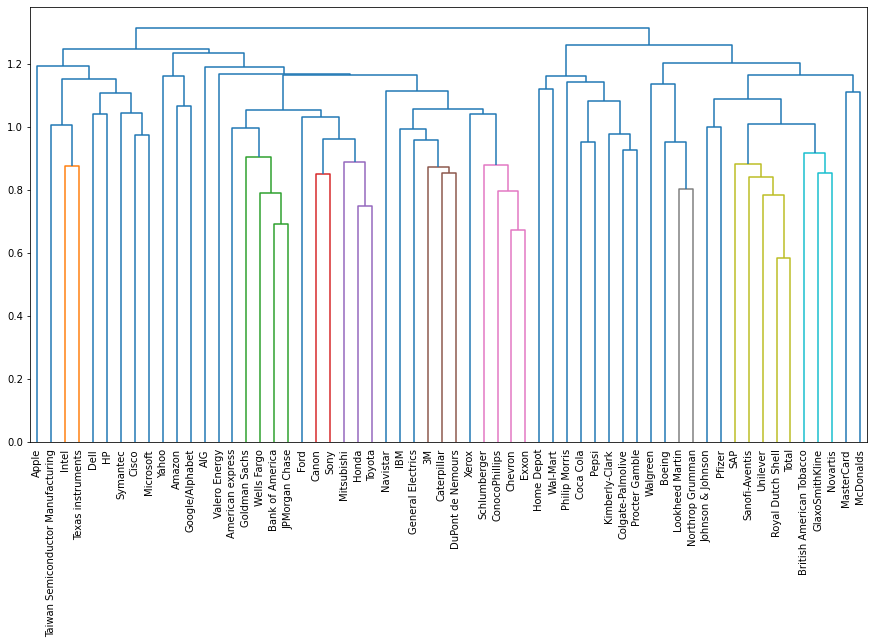

In [19]:
plt.figure(figsize=(15,8))
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=10)
plt.show()